In [16]:
install.packages("Hmisc")
install.packages("caret")
install.packages("mlbench")
install.packages("ggcorrplot")
install.packages("e1071")
install.packages("scales")
install.packages("caTools")

Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'Hmisc' is in use and will not be installed"Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'caret' is in use and will not be installed"Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'mlbench' is in use and will not be installed"Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ggcorrplot' is in use and will not be installed"Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'e1071' is in use and will not be installed"Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'scales' is in use and 

In [17]:
library(Hmisc)
library(caret)
library(mlbench)
library(ggcorrplot)
library(e1071)
library(scales)
library(caTools)

In [39]:
data <- read.csv("F:/UITS/Fall 2020 TRI/weather.csv")

In [40]:
head(data)

ï..outlook,temperature,humidity,windy,label,play
<fct>,<int>,<int>,<lgl>,<int>,<fct>
sunny,85,85,FALSE,0,no
sunny,80,90,TRUE,0,no
overcast,83,83,FALSE,1,yes
rainy,70,96,FALSE,1,yes
rainy,68,80,FALSE,1,yes
rainy,65,70,TRUE,0,no


In [41]:
names(data)[1] <- "outlook" # change firstcoum name as ts
head(data)

outlook,temperature,humidity,windy,label,play
<fct>,<int>,<int>,<lgl>,<int>,<fct>
sunny,85,85,FALSE,0,no
sunny,80,90,TRUE,0,no
overcast,83,83,FALSE,1,yes
rainy,70,96,FALSE,1,yes
rainy,68,80,FALSE,1,yes
rainy,65,70,TRUE,0,no


In [42]:
no_attributes= ncol(data)-2
no_attributes

[1] 4

In [43]:
dt = data [,1:no_attributes]
head(dt)

outlook,temperature,humidity,windy
<fct>,<int>,<int>,<lgl>
sunny,85,85,FALSE
sunny,80,90,TRUE
overcast,83,83,FALSE
rainy,70,96,FALSE
rainy,68,80,FALSE
rainy,65,70,TRUE


In [44]:
orignal_dt= data [, 1:ncol(data)] 
head(orignal_dt)

outlook,temperature,humidity,windy,label,play
<fct>,<int>,<int>,<lgl>,<int>,<fct>
sunny,85,85,FALSE,0,no
sunny,80,90,TRUE,0,no
overcast,83,83,FALSE,1,yes
rainy,70,96,FALSE,1,yes
rainy,68,80,FALSE,1,yes
rainy,65,70,TRUE,0,no


In [45]:
num_conv <- sapply(dt,is.factor) 
num_conv

outlook temperature    humidity       windy 
       TRUE       FALSE       FALSE       FALSE

In [46]:
str_att <- sapply(dt[,num_conv],unclass)
head(str_att)

[1] 3 3 1 2 2 2

In [47]:
num_att <- sapply(dt[,!num_conv],unclass)
head(num_att)

temperature,humidity,windy
85,85,0
80,90,1
83,83,0
70,96,0
68,80,0
65,70,1


In [52]:
out<-cbind(str_att,num_att) 
head(out)

str_att,temperature,humidity,windy
3,85,85,0
3,80,90,1
1,83,83,0
2,70,96,0
2,68,80,0
2,65,70,1


In [55]:
dt_n= as.data.frame(apply(out, 2, rescale, to=c(0,1)))
head(dt_n)

str_att,temperature,humidity,windy
<dbl>,<dbl>,<dbl>,<dbl>
1.0,1.00000000,0.65625,0
1.0,0.76190476,0.81250,1
0.0,0.90476190,0.59375,0
0.5,0.28571429,1.00000,0
0.5,0.19047619,0.50000,0
0.5,0.04761905,0.18750,1


In [64]:
all_dt = cbind (dt_n,data[,ncol(data)-1]) 
head(all_dt)

str_att,temperature,humidity,windy,"data[, ncol(data) - 1]"
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.0,1.00000000,0.65625,0,0
1.0,0.76190476,0.81250,1,0
0.0,0.90476190,0.59375,0,1
0.5,0.28571429,1.00000,0,1
0.5,0.19047619,0.50000,0,1
0.5,0.04761905,0.18750,1,0


In [65]:
names(all_dt)[1] <- "outlook"
head(all_dt)

outlook,temperature,humidity,windy,"data[, ncol(data) - 1]"
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.0,1.00000000,0.65625,0,0
1.0,0.76190476,0.81250,1,0
0.0,0.90476190,0.59375,0,1
0.5,0.28571429,1.00000,0,1
0.5,0.19047619,0.50000,0,1
0.5,0.04761905,0.18750,1,0


In [66]:
names(all_dt)[ncol(all_dt)] <- "label"
head(all_dt)

outlook,temperature,humidity,windy,label
<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.0,1.00000000,0.65625,0,0
1.0,0.76190476,0.81250,1,0
0.0,0.90476190,0.59375,0,1
0.5,0.28571429,1.00000,0,1
0.5,0.19047619,0.50000,0,1
0.5,0.04761905,0.18750,1,0


In [67]:
set.seed(10)
correlationMatrix <- cor_pmat(all_dt) # calculate correlation matrix
correlationMatrix

,outlook,temperature,humidity,windy,label
outlook,0.00000000,0.7211155,0.6103932,0.7923961,0.07303349
temperature,0.72111550,0.0000000,0.3109045,0.2509366,0.68014215
humidity,0.61039323,0.3109045,0.0000000,0.5146305,0.20327979
windy,0.79239609,0.2509366,0.5146305,0.0000000,0.37278428
label,0.07303349,0.6801421,0.2032798,0.3727843,0.00000000


In [59]:
install.packages("corrplot")
library(corrplot)

Installing package into 'C:/Users/SHAWON-PC/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\SHAWON-PC\AppData\Local\Temp\RtmpmCYYJm\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


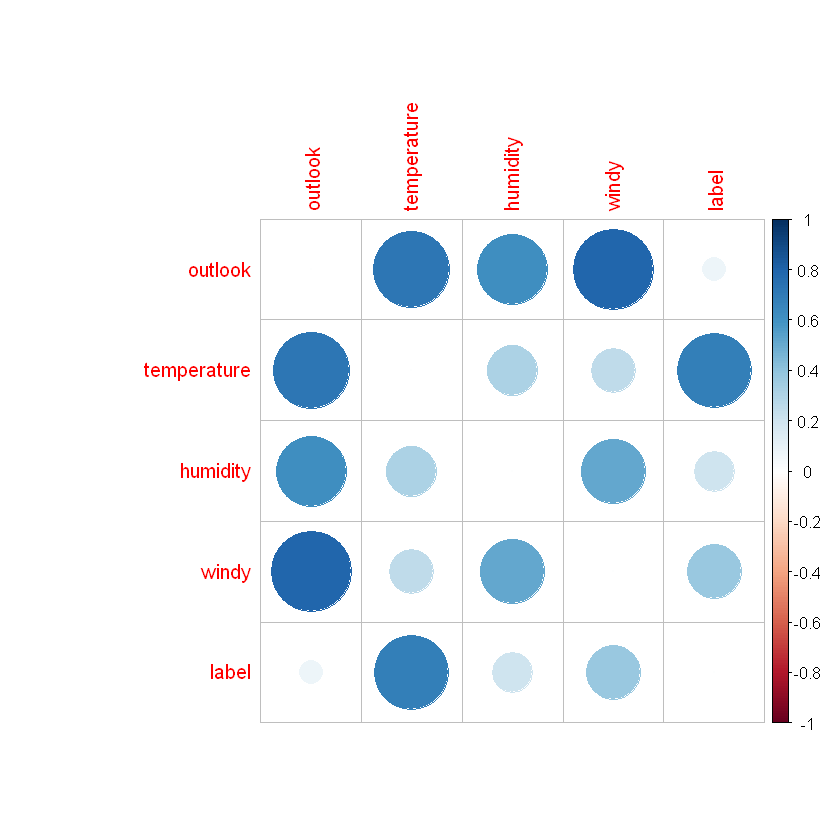

In [68]:
corrplot(correlationMatrix)

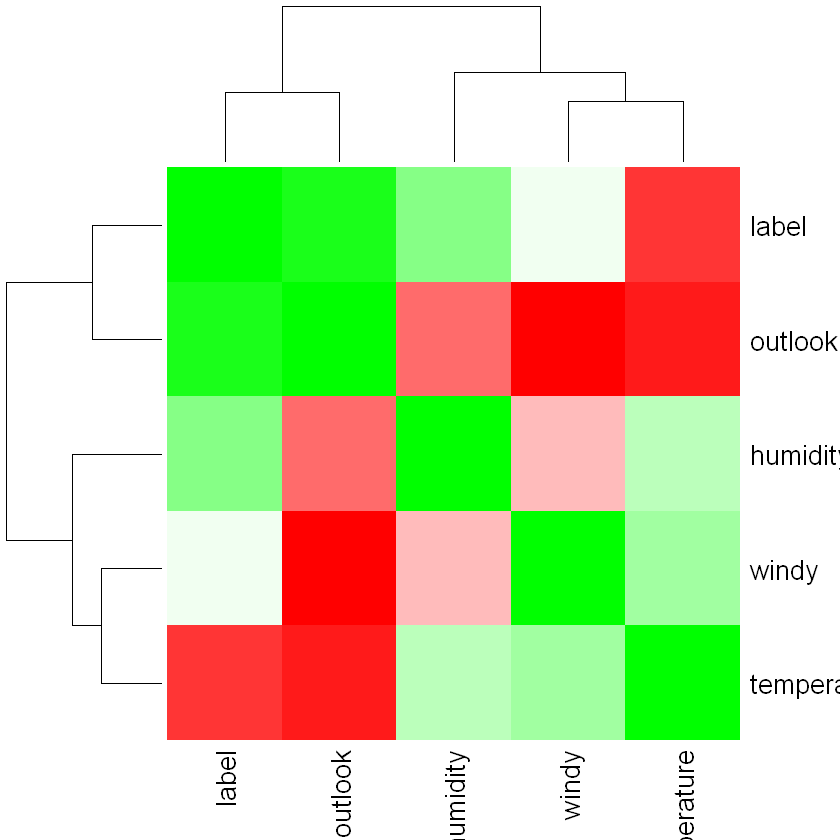

In [69]:
palette = colorRampPalette(c("green", "white", "red")) (20)
heatmap(x = correlationMatrix, col = palette, symm = TRUE)

In [70]:
correlationMatrix[is.na(correlationMatrix)] <- 0
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.5) # find attributes that are highly corrected that is equal 0.8
print(highlyCorrelated) # print indexes of highly correlated attributes

[1] 1 2 4


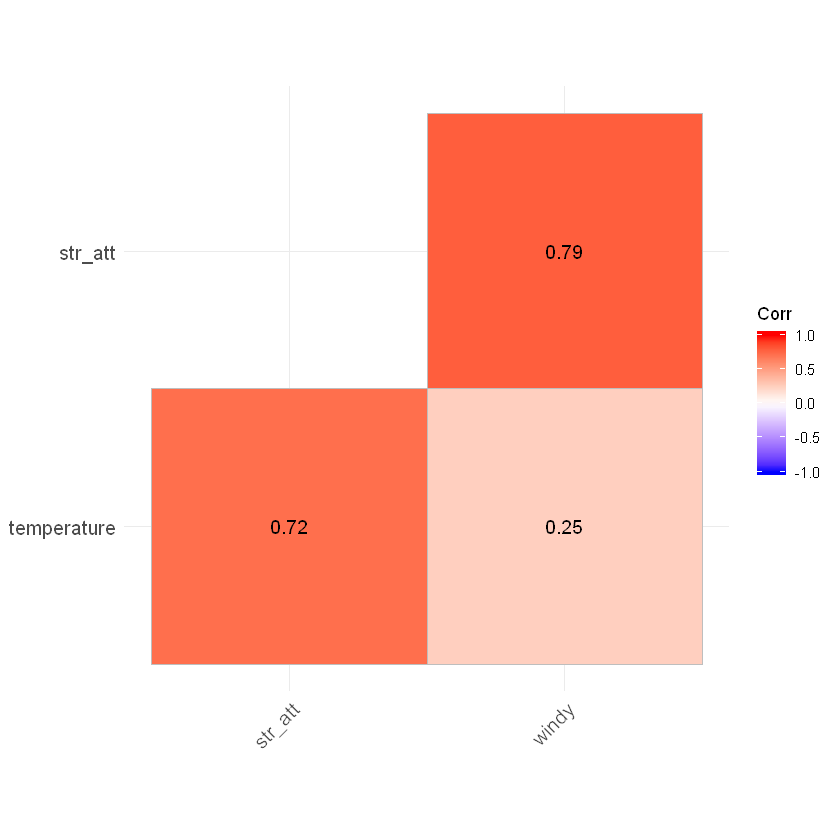

In [79]:
dt_corr = sapply(dt_n[,highlyCorrelated],unclass)
dt_corr_m = cor_pmat(dt_corr)
ggcorrplot(dt_corr_m, hc.order = TRUE, type = "lower", lab = TRUE)

In [80]:
data_corr= cbind(as.data.frame(dt_corr),data[,ncol(data)-1])
names(data_corr)[ncol(data_corr)] <- "label"
head(data_corr)

str_att,temperature,windy,label
<dbl>,<dbl>,<dbl>,<int>
1.0,1.00000000,0,0
1.0,0.76190476,1,0
0.0,0.90476190,0,1
0.5,0.28571429,0,1
0.5,0.19047619,0,1
0.5,0.04761905,1,0


In [81]:
set.seed(3033)
intrain <- createDataPartition(y = data_corr$label, p= 0.7, list = FALSE)

orignal_train <- orignal_dt[intrain,]
orignal_test <- orignal_dt[-intrain,]

filtered_train <- data_corr[intrain,]
filtered_test <- data_corr[-intrain,]

In [82]:
summary(data)

summary(filtered_train)
summary(filtered_test)

summary(orignal_train)
summary(orignal_test)

     outlook   temperature       humidity       windy             label       
 overcast:4   Min.   :64.00   Min.   :64.00   Mode :logical   Min.   :0.0000  
 rainy   :5   1st Qu.:69.25   1st Qu.:71.25   FALSE:8         1st Qu.:0.0000  
 sunny   :5   Median :72.00   Median :81.50   TRUE :6         Median :1.0000  
              Mean   :73.57   Mean   :81.36                   Mean   :0.6429  
              3rd Qu.:78.75   3rd Qu.:90.00                   3rd Qu.:1.0000  
              Max.   :85.00   Max.   :96.00                   Max.   :1.0000  
  play  
 no :5  
 yes:9  
        
        
        
        

    str_att      temperature          windy         label    
 Min.   :0.00   Min.   :0.04762   Min.   :0.0   Min.   :0.0  
 1st Qu.:0.50   1st Qu.:0.29762   1st Qu.:0.0   1st Qu.:0.0  
 Median :0.50   Median :0.38095   Median :0.5   Median :0.5  
 Mean   :0.65   Mean   :0.44286   Mean   :0.5   Mean   :0.5  
 3rd Qu.:1.00   3rd Qu.:0.52381   3rd Qu.:1.0   3rd Qu.:1.0  
 Max.   :1.00   Max.   :1.00000   Max.   :1.0   Max.   :1.0  

    str_att      temperature         windy          label  
 Min.   :0.00   Min.   :0.0000   Min.   :0.00   Min.   :1  
 1st Qu.:0.00   1st Qu.:0.1786   1st Qu.:0.00   1st Qu.:1  
 Median :0.00   Median :0.5238   Median :0.00   Median :1  
 Mean   :0.25   Mean   :0.4881   Mean   :0.25   Mean   :1  
 3rd Qu.:0.25   3rd Qu.:0.8333   3rd Qu.:0.25   3rd Qu.:1  
 Max.   :1.00   Max.   :0.9048   Max.   :1.00   Max.   :1  

     outlook   temperature       humidity       windy             label    
 overcast:1   Min.   :65.00   Min.   :70.00   Mode :logical   Min.   :0.0  
 rainy   :5   1st Qu.:70.25   1st Qu.:80.00   FALSE:5         1st Qu.:0.0  
 sunny   :4   Median :72.00   Median :87.50   TRUE :5         Median :0.5  
              Mean   :73.30   Mean   :84.70                   Mean   :0.5  
              3rd Qu.:75.00   3rd Qu.:90.75                   3rd Qu.:1.0  
              Max.   :85.00   Max.   :96.00                   Max.   :1.0  
  play  
 no :5  
 yes:5  
        
        
        
        

     outlook   temperature       humidity      windy             label  
 overcast:3   Min.   :64.00   Min.   :64.0   Mode :logical   Min.   :1  
 rainy   :0   1st Qu.:67.75   1st Qu.:68.5   FALSE:3         1st Qu.:1  
 sunny   :1   Median :75.00   Median :72.5   TRUE :1         Median :1  
              Mean   :74.25   Mean   :73.0                   Mean   :1  
              3rd Qu.:81.50   3rd Qu.:77.0                   3rd Qu.:1  
              Max.   :83.00   Max.   :83.0                   Max.   :1  
  play  
 no :0  
 yes:4  
        
        
        
        

In [83]:
write.csv(all_dt,'New_Weather.csv')